In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [ ]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1': X[:, 1], 'Label':y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles['Label'].value_counts()

1    500
0    500
Name: Label, dtype: int64

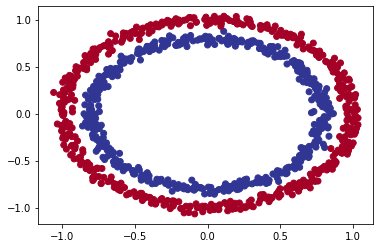

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu);

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']

)

In [ ]:
history = model_1.fit(X[:800], y[:800], epochs = 50, verbose = 0)

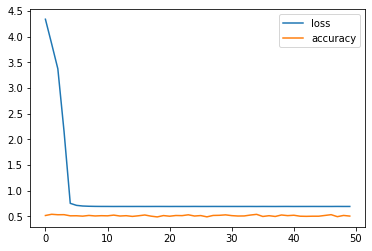

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_1.evaluate(X[800:], y[800:])

7/7 [==============================] - 0s 5ms/step - loss: 0.6994 - accuracy: 0.4150


[0.699373185634613, 0.41499999165534973]

In [ ]:
#Improving our model

In [ ]:
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #Output layer
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy', 'mae'])

model_2.fit(X_train, y_train, epochs = 30)

Epoch 1/30
25/25 [==============================] - 2s 5ms/step - loss: 0.6938 - accuracy: 0.5150 - mae: 0.4984
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5987 - mae: 0.4844
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.7538 - mae: 0.4680
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.7475 - mae: 0.4385
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5267 - accuracy: 0.8200 - mae: 0.4005
Epoch 6/30
25/25 [==============================] - 0s 6ms/step - loss: 0.4947 - accuracy: 0.8037 - mae: 0.3768
Epoch 7/30
25/25 [==============================] - 0s 9ms/step - loss: 0.4069 - accuracy: 0.9700 - mae: 0.3287
Epoch 8/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.9862 - mae: 0.2831
Epoch 9/30
25/25 [==============================] - 0s 5ms/step - loss: 0.2902 - accuracy: 0.9825 - mae:

In [ ]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9950 - mae: 0.0500


[0.05458173155784607, 0.9950000047683716, 0.049996260553598404]

In [ ]:
y_pred = model_2.predict(X_test)
tf.round(y_pred[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
tf.round(y_pred) == y_test[:10]

<tf.Tensor: shape=(200, 10), dtype=bool, numpy=
array([[ True, False,  True, ..., False,  True, False],
       [False,  True, False, ...,  True, False,  True],
       [ True, False,  True, ..., False,  True, False],
       ...,
       [False,  True, False, ...,  True, False,  True],
       [ True, False,  True, ..., False,  True, False],
       [ True, False,  True, ..., False,  True, False]])>

In [ ]:
y_pred[1], y_test[1]

(array([0.0519632], dtype=float32), 0)

In [ ]:
import numpy as np


def plot_decision_boundry(model, X, y):
  x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
  y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("It's a multiclass classification")
    y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
  else:
    print("It's a binaryclass classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

It's a binaryclass classification


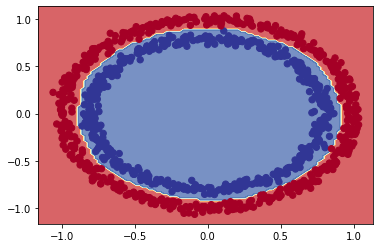

In [ ]:
plot_decision_boundry(model_2, X, y)

It's a binaryclass classification


(-1.1677683182718437, 1.1360036756154805)

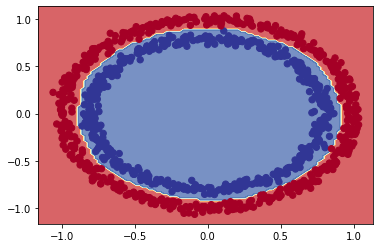

In [ ]:
  x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
  y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model_2.predict(x_in)

  if len(y_pred[0]) > 1:
    print("It's a multiclass classification")
    y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
  else:
    print("It's a binaryclass classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13600368],
       [ 1.11054797,  1.13600368],
       [ 1.13371175,  1.13600368]])

In [ ]:
  x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
  y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))




In [ ]:
np.linspace(x_min, x_max, 100)

array([-1.15950246, -1.13633868, -1.1131749 , -1.09001112, -1.06684734,
       -1.04368356, -1.02051978, -0.997356  , -0.97419222, -0.95102844,
       -0.92786466, -0.90470088, -0.8815371 , -0.85837332, -0.83520954,
       -0.81204576, -0.78888198, -0.7657182 , -0.74255442, -0.71939064,
       -0.69622686, -0.67306308, -0.6498993 , -0.62673552, -0.60357174,
       -0.58040796, -0.55724418, -0.5340804 , -0.51091662, -0.48775284,
       -0.46458906, -0.44142528, -0.4182615 , -0.39509772, -0.37193394,
       -0.34877016, -0.32560638, -0.3024426 , -0.27927882, -0.25611504,
       -0.23295126, -0.20978748, -0.1866237 , -0.16345992, -0.14029614,
       -0.11713236, -0.09396858, -0.0708048 , -0.04764102, -0.02447724,
       -0.00131346,  0.02185032,  0.0450141 ,  0.06817788,  0.09134166,
        0.11450544,  0.13766922,  0.160833  ,  0.18399678,  0.20716056,
        0.23032434,  0.25348812,  0.2766519 ,  0.29981568,  0.32297946,
        0.34614324,  0.36930702,  0.39247079,  0.41563457,  0.43

In [ ]:
xx

array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       ...,
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175]])

In [ ]:
'''N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()'''

"N = 100 # number of points per class\nD = 2 # dimensionality\nK = 3 # number of classes\nX = np.zeros((N*K,D)) # data matrix (each row = single example)\ny = np.zeros(N*K, dtype='uint8') # class labels\nfor j in range(K):\n  ix = range(N*j,N*(j+1))\n  r = np.linspace(0.0,1,N) # radius\n  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta\n  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]\n  y[ix] = j\n# lets visualize the data:\nplt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)\nplt.show()"

In [ ]:
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons with input_shape defined (None, 1) = look at 1 sample at a time
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs=100) # fit for 100 passes of the data

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

In [ ]:
model_3.predict(tf.expand_dims([10], axis = 1))

array([[20.652414]], dtype=float32)

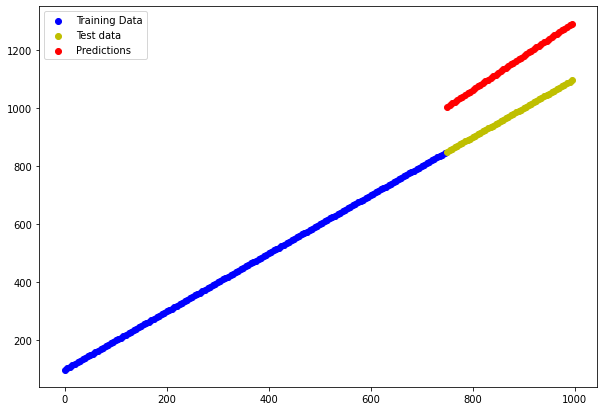

In [ ]:
y_pred = model_3.predict(y_reg_test)
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label = 'Training Data')
plt.scatter(X_reg_test, y_reg_test, c ='y', label = 'Test data')
plt.scatter(X_reg_test, y_pred, c = 'r', label = "Predictions")
plt.legend();

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

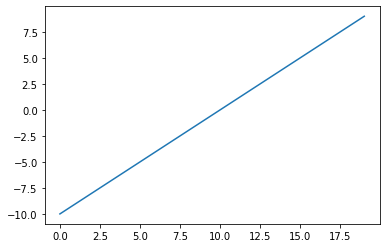

In [ ]:
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

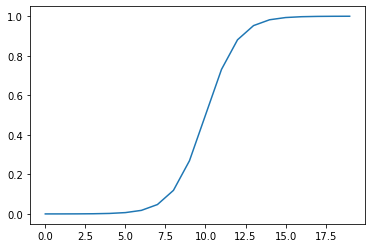

In [ ]:
plt.plot(sigmoid(A))

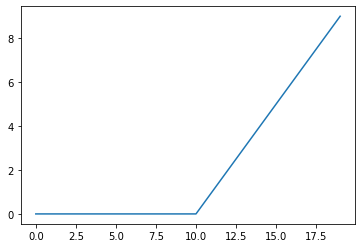

In [ ]:
def relu(x):
  return tf.maximum(0, x)

plt.plot(relu(A))

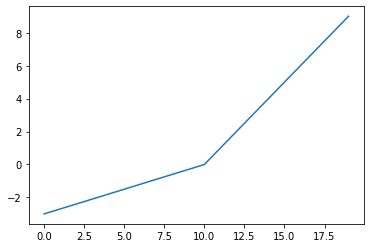

In [ ]:
def leakyRelu(x):
  return tf.maximum(x * 0.3, x)

plt.plot(leakyRelu(A))

In [ ]:
X_train

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])


model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

In [ ]:
history = model_4.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5462
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5775
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6388
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7013
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7362
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.9150
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.9750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.9875
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9862
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9737
Epoch 11/25
25/25 [

In [ ]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9950


[0.03416474908590317, 0.9950000047683716]

It's a binaryclass classification
It's a binaryclass classification


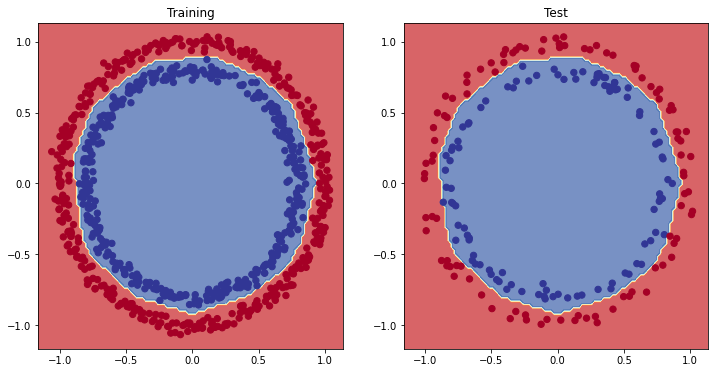

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundry(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(model_4, X_test, y_test)
plt.show();

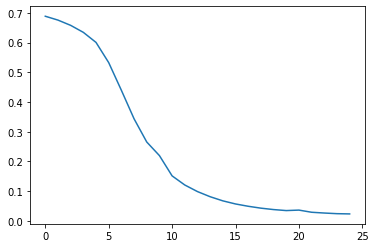

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
pd.DataFrame(history.history)[:5]

,loss,accuracy
0,0.688552,0.54625
1,0.675575,0.57750
2,0.657901,0.63875
3,0.634346,0.70125
4,0.600510,0.73625


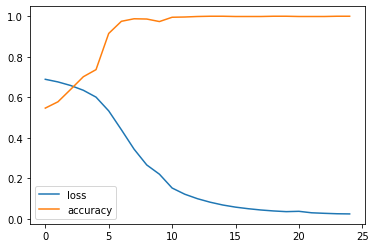

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_5.compile(
    loss = 'binary_crossentropy', #loss = tf.keras.losses.BinaryCrossentropy()
    optimizer = 'Adam', #optimizer = tf.keras.optimizers.Adam()
    metrics = ['accuracy']
)


In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

In [ ]:
history_5 = model_5.fit(X_train, y_train, epochs = 100, callbacks= [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

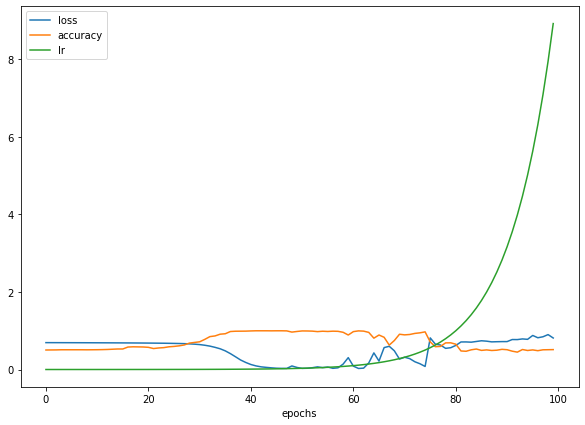

In [ ]:
pd.DataFrame(history_5.history).plot(figsize = (10, 7), xlabel = 'epochs')

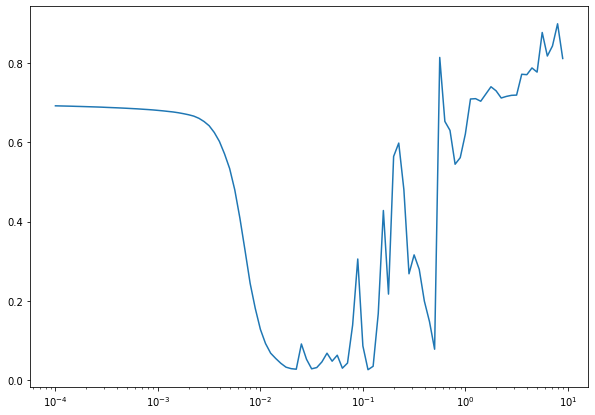

In [ ]:
lrs = 1e-4 * 10 **(tf.range(100) / 20)
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_5.history['loss'])

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_4.predict(X_test)

confusion_matrix(y_test, y_preds.round())

array([[100,   0],
       [  1,  99]])

In [ ]:
import itertools


def plot_confusion_matrix(y_test, y_preds):
  figsize = (10, 10)

  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm_norm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)

  cax = ax.matshow(cm, cmap = plt.cm.Blues)

  fig.colorbar(cax)

  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = 'Confusion Matrix',
        xlabel = "Predicted Label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels);

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)


  threshold = (cm.max() + cm.min()) / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size = 15)

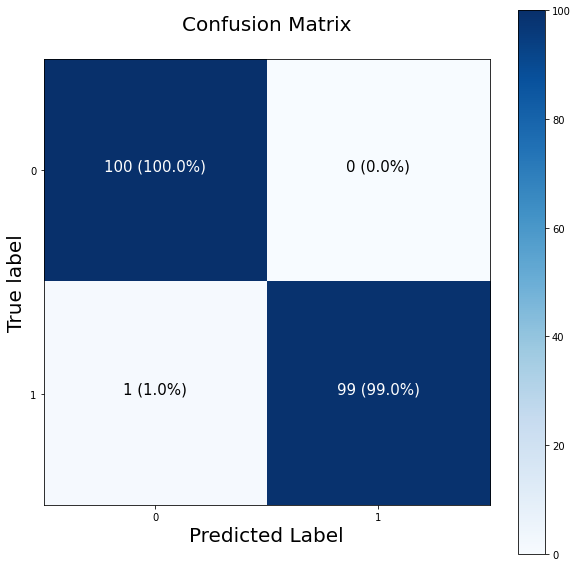

In [ ]:
plot_confusion_matrix(y_test, y_preds)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(training_data, training_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
len(training_data), len(test_data), training_data.shape, training_data.ndim, training_data.dtype

(60000, 10000, (60000, 28, 28), 3, dtype('uint8'))

In [ ]:
training_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

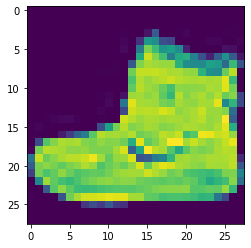

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0]);

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

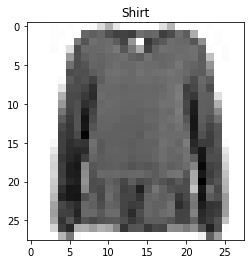

In [ ]:
index_of_choice = 18
plt.imshow(training_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[training_labels[index_of_choice]]);

In [ ]:
28*28

784

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model_6.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
non_norm_history = model_6.fit(training_data, tf.one_hot(training_labels, depth = 10),
                               epochs = 10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data_norm = training_data / 255.0
test_data_norm = test_data / 255.0


In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model_7.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
norm_history = model_7.fit(train_data_norm, training_labels,
            validation_data = (test_data_norm, test_labels),
            epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

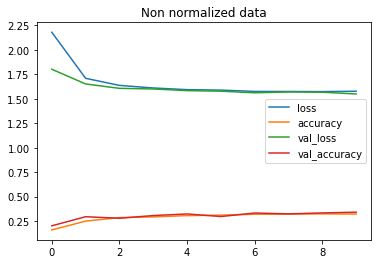

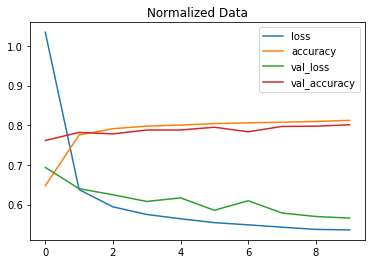

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title = 'Non normalized data')
pd.DataFrame(norm_history.history).plot(title = 'Normalized Data')

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model_8.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = model_8.fit(train_data_norm,
                              training_labels,
                              epochs = 40,
                              callbacks = [lr_scheduler],
                              validation_data = (test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

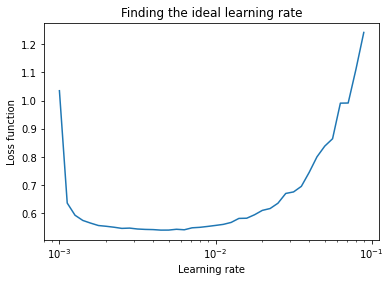

In [ ]:
lrs = 1e-3 * 10 ** (tf.range(40) / 20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss function")
plt.title("Finding the ideal learning rate");

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):


  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm_norm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)

  cax = ax.matshow(cm, cmap = plt.cm.Blues)

  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = 'Confusion Matrix',
        xlabel = "Predicted Label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels);

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  threshold = (cm.max() + cm.min()) / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size = text_size)

In [ ]:
y_probs = model_7.predict(test_data_norm)

In [ ]:
y_probs

array([[2.67574546e-10, 8.36213457e-15, 4.81269926e-05, ...,
        8.82699490e-02, 6.16734428e-03, 6.32037938e-01],
       [8.12879880e-05, 5.76163500e-15, 9.49077785e-01, ...,
        5.20503552e-26, 1.70957341e-04, 7.83173491e-08],
       [1.09286346e-04, 9.96481419e-01, 9.71148317e-09, ...,
        1.49557408e-18, 3.59248631e-08, 2.74249939e-14],
       ...,
       [8.61480758e-02, 5.39734137e-05, 1.40477180e-01, ...,
        5.26897268e-15, 1.56244576e-01, 2.15782688e-06],
       [1.09143541e-04, 9.92067456e-01, 8.19262240e-08, ...,
        6.06582723e-14, 8.80333857e-07, 1.78487555e-11],
       [3.26440244e-07, 2.94176655e-10, 3.81626800e-04, ...,
        4.96944785e-02, 5.25690848e-03, 4.55987826e-02]], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)

AttributeError: ignored

In [ ]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

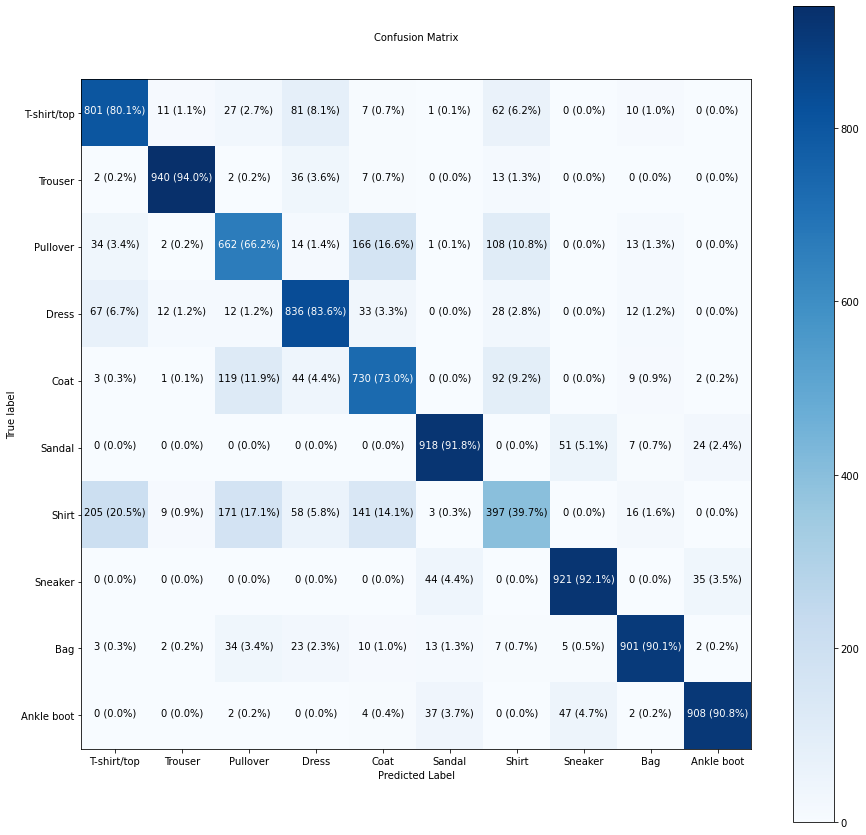

In [ ]:
make_confusion_matrix(test_labels, y_preds,classes = class_names, figsize = (15,15), text_size = 10)

In [ ]:
m = tf.keras.metrics.Accuracy()
m.update_state(test_labels, y_preds)
m.result().numpy()

0.8014

In [ ]:
import random

def plot_random_image(model, images, true_labels,classes):
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

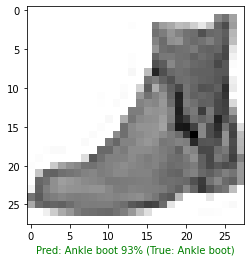

In [ ]:
plot_random_image(model = model_7,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

In [ ]:
model_7.layers

In [ ]:
weights, biases = model_7.layers[1].get_weights()

In [ ]:
biases

array([-0.07772572,  0.0873898 , -0.36895892,  0.72360253], dtype=float32)

In [ ]:
weights, weights.shape

(array([[ 0.38586003, -0.01683247, -0.48614588, -0.53817403],
        [ 0.09176368, -0.07343115, -0.27991343,  0.04825689],
        [ 0.4390812 ,  0.46483955, -0.64234936, -0.44439003],
        ...,
        [-0.25405496,  0.537942  , -0.1541088 ,  0.15027745],
        [-0.23082383,  0.45492023,  0.0833154 , -0.3790487 ],
        [ 0.15038288,  0.13788232, -0.1480692 , -0.01065991]],
       dtype=float32), (784, 4))

In [ ]:
weights_1, biases_1 = model_7.layers[2].get_weights()
weights_1.shape

(4, 4)

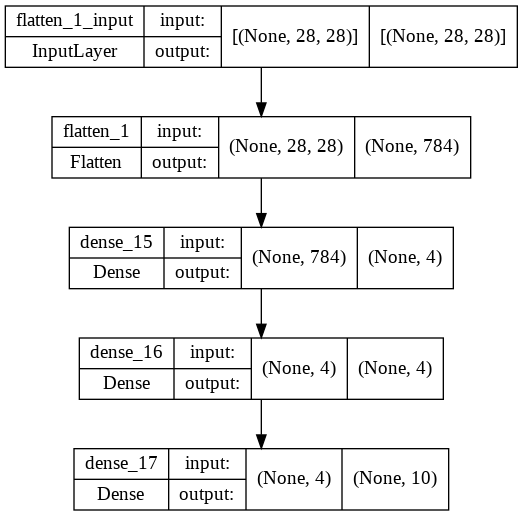

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes = True)